# Introdução

Este notebook apresenta um estudo de caso completo com base no serviço de compartilhamento de bicicletas da empresa fictícia Cyclistic. O objetivo é analisar o comportamento de usuários e gerar insights que ajudem a empresa a aumentar sua base de assinantes anuais, convertendo usuários casuais.

A empresa Cyclistic oferece um serviço de aluguel de bicicletas com três opções de usuários: membros anuais, usuários casuais de passe diário e usuários de passe único. A equipe de marketing acredita que é possível aumentar a receita incentivando os usuários casuais a se tornarem membros anuais. Para isso, é necessário entender como esses grupos se comportam e como a comunicação pode ser direcionada de forma eficaz.

### 🔍 Etapa: Perguntar (Ask)

**Perguntas de negócio:**
1. **Por que os usuários casuais comprariam assinaturas anuais da Cyclistic?**  
2. **Como a Cyclistic pode usar mídia digital para influenciar esses usuários casuais a se tornarem membros?**

**Tarefas principais:**
- Investigar os dados de uso para **entender as diferenças de comportamento** entre usuários casuais e membros anuais.
- **Identificar padrões de uso** que possam apoiar estratégias de marketing.
- **Relacionar dados comportamentais com decisões de negócio** voltadas à conversão.

**Stakeholders principais:**
- **Lily Moreno** – diretora de marketing, responsável por tomar decisões estratégicas
- **Equipe executiva da Cyclistic** – aprova e financia ações propostas
- **Equipe de marketing** – aplicará estratégias baseadas nos insights
- **Usuários da Cyclistic** – foco da mudança comportamental

**Entregável:**

> Uma análise detalhada do comportamento de uso entre usuários casuais e membros anuais, com **insights acionáveis que respondam às perguntas de negócio acima** e subsidiem uma estratégia de marketing digital para aumentar a conversão.

A seguir, iniciamos o carregamento e a preparação dos dados para análise.

### ✅ Leitura dos CSVs (Python)

In [1]:
import pandas as pd

# Leitura dos arquivos CSV (ajuste o caminho conforme necessário)
df1 = pd.read_csv("/kaggle/input/cyclistic-dataset-2/Divvy_Trips_2019_Q1.csv")
df2 = pd.read_csv("/kaggle/input/cyclistic-dataset-2/Divvy_Trips_2019_Q2.csv")
df3 = pd.read_csv("/kaggle/input/cyclistic-dataset-2/Divvy_Trips_2019_Q3.csv")
df4 = pd.read_csv("/kaggle/input/cyclistic-dataset-2/Divvy_Trips_2019_Q4.csv")
df5 = pd.read_csv("/kaggle/input/cyclistic-dataset-2/Divvy_Trips_2020_Q1.csv")

# Exibir colunas para análise
print("Q1 2019:", df1.columns.tolist())
print("Q2 2019:", df2.columns.tolist())
print("Q3 2019:", df3.columns.tolist())
print("Q4 2019:", df4.columns.tolist())
print("Q1 2020:", df5.columns.tolist())


Q1 2019: ['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']
Q2 2019: ['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time', '01 - Rental Details Local End Time', '01 - Rental Details Bike ID', '01 - Rental Details Duration In Seconds Uncapped', '03 - Rental Start Station ID', '03 - Rental Start Station Name', '02 - Rental End Station ID', '02 - Rental End Station Name', 'User Type', 'Member Gender', '05 - Member Details Member Birthday Year']
Q3 2019: ['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']
Q4 2019: ['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']
Q1 2020: ['ride_id', 'rideable_type', 'sta

### ✅ Análise do primeiro arquivo: 2020_Q1.csv

In [4]:
#Sempre verificar os 10 primeiros dados da planilha
df5.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
5,6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96.0,41.8899,-87.6343,41.8846,-87.6446,member
6,31EB9B8F406D4C82,docked_bike,2020-01-10 13:07:35,2020-01-10 13:12:24,Desplaines St & Randolph St,96,Wells St & Hubbard St,212.0,41.8846,-87.6446,41.8899,-87.6343,member
7,A2B24E3F9C9720E3,docked_bike,2020-01-10 07:24:53,2020-01-10 07:29:50,Desplaines St & Randolph St,96,Wells St & Hubbard St,212.0,41.8846,-87.6446,41.8899,-87.6343,member
8,5E3F01E1441730B7,docked_bike,2020-01-31 16:37:16,2020-01-31 16:42:11,Wells St & Hubbard St,212,Desplaines St & Randolph St,96.0,41.8899,-87.6343,41.8846,-87.6446,member
9,19DC57F7E3140131,docked_bike,2020-01-31 09:39:17,2020-01-31 09:42:40,Clark St & Lake St,38,Orleans St & Merchandise Mart Plaza,100.0,41.8860,-87.6309,41.8882,-87.6364,member


# Etapa: Preparar (Prepare)

Nesta etapa, os arquivos CSV contendo os dados de viagens com bicicletas compartilhadas foram lidos e preparados para análise, com um foco especial em manter a consistência dos dados para posterior uso com **consultas SQL puras**.

Python foi utilizado apenas como ferramenta de apoio técnico para:
- Leitura dos arquivos `.csv`
- Criação do banco de dados SQLite local
- Visualizações finais com bibliotecas gráficas

### 📁 Estrutura adotada:

1. **Leitura de múltiplos arquivos CSV** contendo dados trimestrais.
2. **Padronização mínima via Python** apenas para garantir que as colunas essenciais estivessem presentes.
3. **Criação da tabela SQLite** com os tipos de dados adequados para viabilizar transformações em SQL.
4. **Inserção dos dados brutos na tabela**, mantendo a integridade dos registros.

### 🔧 Transformações feitas via SQL:

- Conversão e padronização de colunas como `user_type`
- Criação da coluna `trip_duration` a partir das datas de início e fim
- Filtro de registros inconsistentes com duração inválida
- Conversão e extração de partes da data (dia da semana, hora, mês)
- Normalização de campos nulos como gênero e ano de nascimento

A seguir, as transformações e filtros foram realizados inteiramente com **consultas SQL**, permitindo um fluxo limpo e auditável.

### Padronização e Unificação dos Dados

Os dados utilizados neste projeto foram fornecidos em cinco arquivos CSV, cada um representando um trimestre dos anos de 2019 e início de 2020.

Contudo, esses arquivos possuem diferenças estruturais, como:

- Nomes de colunas variados
- Ausência de algumas colunas em determinados arquivos
- Mudanças na estrutura do dataset a partir de 2020 (como a introdução das colunas rideable_type, start_lat, start_lng, etc.)

Nesta etapa, realizamos as seguintes ações:

1. Renomeamos colunas para seguir um padrão único, independente do trimestre.
2. Preenchemos colunas ausentes com valores nulos (None) para manter a consistência estrutural.
3. Padronizamos a ordem das colunas em todos os arquivos.
4. Concatenamos todos os arquivos em um único dataframe chamado df_unificado, que servirá como base para criação do banco SQLite.

Esta preparação é fundamental para garantir que os dados estejam limpos e prontos para análise via SQL nas próximas etapas.

### ✅ Etapa 1 - Padronização do arquivo: 2020_Q1.csv

In [5]:
# 1. Eliminar colunas irrelevantes (sem erro se não existirem)
colunas_para_excluir = ['rideable_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
df5.drop(columns=colunas_para_excluir, inplace=True, errors='ignore')

# 2. Acrescentar colunas 'gender' e 'birthyear' com valores nulos (apenas se não existirem)
for coluna in ['gender', 'birthyear']:
    if coluna not in df5.columns:
        df5[coluna] = None

# 3. Converter colunas de data apenas se existirem
for col in ['started_at', 'ended_at']:
    if col in df5.columns:
        df5[col] = pd.to_datetime(df5[col], errors='coerce')

# 4. Criar coluna 'trip_duration' em minutos, com 1 casa decimal, se colunas de data existirem
if 'started_at' in df5.columns and 'ended_at' in df5.columns:
    trip_duration = ((df5['ended_at'] - df5['started_at']).dt.total_seconds()).round(1)

    if 'trip_duration' in df5.columns:
        df5['trip_duration'] = trip_duration  # sobrescreve
    else:
        pos = df5.columns.get_loc('ended_at') + 1
        df5.insert(pos, 'trip_duration', trip_duration)

# 5. Renomear colunas para padronizar com os demais dataframes
df5.rename(columns={
    'ride_id': 'trip_id',
    'started_at': 'start_time',
    'ended_at': 'end_time',
    'trip_duration': 'tripduration',
    'start_station_name': 'from_station_name',
    'start_station_id': 'from_station_id',
    'end_station_name': 'to_station_name',
    'end_station_id': 'to_station_id',
    'member_casual': 'usertype'
}, inplace=True)

# Criar a coluna bikeid após a coluna end_time (com valor nulo por padrão)
if 'bikeid' not in df5.columns and 'end_time' in df5.columns:
    pos = df5.columns.get_loc('end_time') + 1
    df5.insert(pos, 'bikeid', None)

# 6. Reorganizar as colunas na ordem desejada
colunas_padronizadas = [
    'trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
    'from_station_id', 'from_station_name',
    'to_station_id', 'to_station_name',
    'usertype', 'gender', 'birthyear'
]

# Reorganizar o dataframe conforme a ordem
df5 = df5[colunas_padronizadas]

# Visualizar as colunas para confirmar
df5.head()




,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,EACB19130B0CDA4A,2020-01-21 20:06:59,2020-01-21 20:14:30,None,451.0,239,Western Ave & Leland Ave,326.0,Clark St & Leland Ave,member,None,None
1,8FED874C809DC021,2020-01-30 14:22:39,2020-01-30 14:26:22,None,223.0,234,Clark St & Montrose Ave,318.0,Southport Ave & Irving Park Rd,member,None,None
2,789F3C21E472CA96,2020-01-09 19:29:26,2020-01-09 19:32:17,None,171.0,296,Broadway & Belmont Ave,117.0,Wilton Ave & Belmont Ave,member,None,None
3,C9A388DAC6ABF313,2020-01-06 16:17:07,2020-01-06 16:25:56,None,529.0,51,Clark St & Randolph St,24.0,Fairbanks Ct & Grand Ave,member,None,None
4,943BC3CBECCFD662,2020-01-30 08:37:16,2020-01-30 08:42:48,None,332.0,66,Clinton St & Lake St,212.0,Wells St & Hubbard St,member,None,None


In [6]:
#mudar gender e birth year em vez de "None" colocar "Unknown" para padronizar informações:
# Substituir valores nulos por "Unknown" nas colunas de gênero e ano de nascimento
df5['gender'] = df5['gender'].fillna('Unknown')
df5['birthyear'] = df5['birthyear'].fillna('Unknown')

df5.head()


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,EACB19130B0CDA4A,2020-01-21 20:06:59,2020-01-21 20:14:30,None,451.0,239,Western Ave & Leland Ave,326.0,Clark St & Leland Ave,member,Unknown,Unknown
1,8FED874C809DC021,2020-01-30 14:22:39,2020-01-30 14:26:22,None,223.0,234,Clark St & Montrose Ave,318.0,Southport Ave & Irving Park Rd,member,Unknown,Unknown
2,789F3C21E472CA96,2020-01-09 19:29:26,2020-01-09 19:32:17,None,171.0,296,Broadway & Belmont Ave,117.0,Wilton Ave & Belmont Ave,member,Unknown,Unknown
3,C9A388DAC6ABF313,2020-01-06 16:17:07,2020-01-06 16:25:56,None,529.0,51,Clark St & Randolph St,24.0,Fairbanks Ct & Grand Ave,member,Unknown,Unknown
4,943BC3CBECCFD662,2020-01-30 08:37:16,2020-01-30 08:42:48,None,332.0,66,Clinton St & Lake St,212.0,Wells St & Hubbard St,member,Unknown,Unknown


In [7]:
df4.sort_values(by='tripduration', ascending=False)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
41623,25267191,2019-10-03 18:47:37,2019-10-03 19:04:17,5788,999.0,20,Sheffield Ave & Kingsbury St,374,Western Ave & Walton St,Subscriber,Male,1990.0
204341,25436680,2019-10-15 22:30:14,2019-10-15 22:46:54,3978,999.0,163,Damen Ave & Clybourn Ave,210,Ashland Ave & Division St,Subscriber,Female,1985.0
166104,25397035,2019-10-12 19:46:54,2019-10-12 20:03:34,252,999.0,218,Wells St & 19th St,207,Emerald Ave & 28th St,Customer,NaN,1996.0
97122,25325317,2019-10-07 18:40:37,2019-10-07 18:57:17,4909,999.0,35,Streeter Dr & Grand Ave,288,Larrabee St & Armitage Ave,Subscriber,Male,1993.0
131614,25361142,2019-10-09 18:30:25,2019-10-09 18:47:04,3805,999.0,475,Washtenaw Ave & Lawrence Ave,295,Broadway & Argyle St,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...
427578,25671130,2019-11-07 18:23:14,2019-11-07 18:39:54,4801,"1,000.0",91,Clinton St & Washington Blvd,22,May St & Taylor St,Subscriber,Female,1986.0
529745,25778995,2019-11-25 17:40:16,2019-11-25 17:56:56,5895,"1,000.0",275,Ashland Ave & 13th St,178,State St & 19th St,Subscriber,Male,1986.0
58132,25284470,2019-10-04 22:16:15,2019-10-04 22:32:56,3551,"1,000.0",59,Wabash Ave & Roosevelt Rd,171,May St & Cullerton St,Subscriber,Male,1996.0
412064,25654926,2019-11-06 06:45:13,2019-11-06 07:01:54,4275,"1,000.0",130,Damen Ave & Division St,134,Peoria St & Jackson Blvd,Subscriber,Male,1996.0


## ✅ Etapa 2 – Análise do segundo arquivo: 2019_Q2.csv

In [8]:
#Verificar os dados
df2.head(10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0
5,22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257.0,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999.0
6,22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548.0,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969.0
7,22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383.0,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991.0
8,22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,"2,137.0",211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NaN,NaN
9,22178538,2019-04-01 00:32:19,2019-04-01 01:07:39,5534,"2,120.0",211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NaN,NaN


In [9]:
print(df2.dtypes)

01 - Rental Details Rental ID                         int64
01 - Rental Details Local Start Time                 object
01 - Rental Details Local End Time                   object
01 - Rental Details Bike ID                           int64
01 - Rental Details Duration In Seconds Uncapped     object
03 - Rental Start Station ID                          int64
03 - Rental Start Station Name                       object
02 - Rental End Station ID                            int64
02 - Rental End Station Name                         object
User Type                                            object
Member Gender                                        object
05 - Member Details Member Birthday Year            float64
dtype: object


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

### ✅ Padronização do arquivo: 2019_Q2.csv

In [11]:
# 1. Renomear colunas com nomes padronizados
df2.rename(columns={
    '01 - Rental Details Rental ID': 'trip_id',
    '01 - Rental Details Local Start Time': 'start_time',
    '01 - Rental Details Local End Time': 'end_time',
    '01 - Rental Details Bike ID': 'bikeid',
    '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',  # será recalculado
    '03 - Rental Start Station ID': 'from_station_id',
    '03 - Rental Start Station Name': 'from_station_name',
    '02 - Rental End Station ID': 'to_station_id',
    '02 - Rental End Station Name': 'to_station_name',
    'User Type': 'usertype',
    'Member Gender': 'gender',
    '05 - Member Details Member Birthday Year': 'birthyear'
}, inplace=True)

# 2. Converter start_time e end_time para datetime
df2['start_time'] = pd.to_datetime(df2['start_time'], errors='coerce')
df2['end_time'] = pd.to_datetime(df2['end_time'], errors='coerce')

# 3. Recalcular tripduration com base nas datas, em minutos, com 1 casa decimal - arquivo veio com "," no lugar de "." o que fez com que os valores viessem inconsistentes
df2['tripduration'] = ((df2['end_time'] - df2['start_time']).dt.total_seconds() / 60).round(1)

#4. preencher valores de gender e birthyear que não existem por "Unknown"
df2['gender'] = df2['gender'].fillna('Unknown')
df2['birthyear'] = df2['birthyear'].fillna('Unknown')

#5. Padronizar valores do usertype "Subscriber" = "member" e "Customer" = "casual"
df2['usertype'] = df2['usertype'].replace({
    'Subscriber': 'member',
    'Customer': 'casual'
})


# Visualizar os dados tratados
df2.head()


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,7.4,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,17.5,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,4.2,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,6.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,16.8,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,Male,1992.0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1108163 non-null  int64         
 1   start_time         1108163 non-null  datetime64[ns]
 2   end_time           1108163 non-null  datetime64[ns]
 3   bikeid             1108163 non-null  int64         
 4   tripduration       1108163 non-null  float64       
 5   from_station_id    1108163 non-null  int64         
 6   from_station_name  1108163 non-null  object        
 7   to_station_id      1108163 non-null  int64         
 8   to_station_name    1108163 non-null  object        
 9   usertype           1108163 non-null  object        
 10  gender             1108163 non-null  object        
 11  birthyear          1108163 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 101.5+ MB


## ✅ Etapa:3 Padronização do arquivo: 2019_Q3.csv

### 🧹 Limpeza do `df3` – Correção de `tripduration` e Datas

Durante a inspeção do `df3` (Q3 2019), foi identificado que a coluna `tripduration` está com valores no formato incorreto, utilizando vírgula ao invés de ponto decimal (ex: "5,2" ao invés de "5.2"). Isso impede que os dados sejam corretamente tratados como numéricos.

Além disso, as colunas `start_time` e `end_time` precisam ser convertidas para o tipo `datetime` para garantir consistência com os demais dataframes.

#### ✅ Ações realizadas:
- Recalcular `tripduration` com base na diferença entre `end_time` e `start_time`, garantindo minutos com uma casa decimal.
- Converter `start_time` e `end_time` para o formato `datetime`.


In [13]:
df3.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [16]:
# 1. Converter start_time e end_time para datetime
df3['start_time'] = pd.to_datetime(df3['start_time'], errors='coerce')
df3['end_time'] = pd.to_datetime(df3['end_time'], errors='coerce')

# 2. Recalcular tripduration em minutos com 1 casa decimal
df3['tripduration'] = ((df3['end_time'] - df3['start_time']).dt.total_seconds() / 60).round(1)

#3 converter valores nulos na coluna gender e birthyear para "Unknown"
df3['gender'] = df3['gender'].fillna('Unknown')
df3['birthyear'] = df3['birthyear'].fillna('Unknown')

# Visualização rápida para validação
df3.head()




,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,20.2,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,17.5,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,Unknown,Unknown
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,25.9,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Unknown,Unknown
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,25.0,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Unknown,Unknown
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,20.2,168,Michigan Ave & 14th St,62,McCormick Place,Customer,Unknown,Unknown


## ✅ Etapa 4: Concatenar os dataframes para poder fazer as ultimas adequações

Após realizar o pré-processamento individual de cada um dos cinco dataframes referentes aos trimestres de 2019 e início de 2020, consolidamos todos eles em um único dataframe, df_final. Essa concatenação permite aplicar de forma centralizada as últimas padronizações e correções, garantindo consistência em toda a base de dados.

Com os dados unificados, podemos realizar ajustes finais como:

Padronização de valores nulos nas colunas gender e birthyear, substituindo por "Unknown" para manter integridade informacional sem perder registros.

Unificação das categorias da coluna usertype, alinhando os termos utilizados em 2019 (Subscriber, Customer) com os de 2020 (member, casual).

Conversão segura das colunas start_time e end_time para o formato datetime, essencial para análises temporais e cálculos de duração mais robustos.

Esse passo consolida o tratamento da base e prepara o conjunto de dados para análises e visualizações confiáveis na próxima etapa do projeto.

In [17]:
# 1. Concatenar todos os dataframes
df_final = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# 2. Padronizar valores nulos em 'gender' e 'birthyear'
df_final['gender'] = df_final['gender'].fillna('Unknown')
df_final['birthyear'] = df_final['birthyear'].fillna('Unknown')

# 3. Padronizar valores em 'usertype'
df_final['usertype'] = df_final['usertype'].replace({
    'Subscriber': 'member',
    'Customer': 'casual'
})

# 4. Garantir que 'start_time' e 'end_time' estão no formato datetime
df_final['start_time'] = pd.to_datetime(df_final['start_time'], errors='coerce')
df_final['end_time'] = pd.to_datetime(df_final['end_time'], errors='coerce')

# 5. Calcular 'tripduration' em minutos
df_final['tripduration'] = round((df_final['end_time'] - df_final['start_time']).dt.total_seconds() / 60,2)

# Manter apenas viagens com duração entre 1 minuto e 300 minutos (5 horas)
df_final = df_final[(df_final['tripduration'] > 0) & (df_final['tripduration'] <= 300)]

# Visualizar preview
df_final.head()



,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,6.50,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,7.35,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,13.82,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,29.72,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,6.07,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,Male,1994.0


In [18]:
df_final.sort_values(by='tripduration', ascending=False)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
2236359,24307266,2019-08-10 17:15:33,2019-08-10 22:15:32,1262,299.98,458,Broadway & Thorndale Ave,174.0,Canal St & Madison St,casual,Male,1977.0
922009,22834466,2019-05-26 14:29:11,2019-05-26 19:29:00,6239,299.82,299,Halsted St & Roscoe St,249.0,Montrose Harbor,casual,Unknown,Unknown
2497765,24582073,2019-08-24 23:18:20,2019-08-25 04:18:07,57,299.78,47,State St & Kinzie St,28.0,Larrabee St & Menomonee St,casual,Unknown,Unknown
2236371,24307280,2019-08-10 17:15:57,2019-08-10 22:15:40,1665,299.72,458,Broadway & Thorndale Ave,174.0,Canal St & Madison St,casual,Male,1977.0
277328,22076076,2019-03-18 11:50:16,2019-03-18 16:49:54,4057,299.63,43,Michigan Ave & Washington St,35.0,Streeter Dr & Grand Ave,casual,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
4151852,84616CAD0B33613F,2020-03-19 10:30:10,2020-03-19 10:30:11,None,0.02,675,HQ QR,675.0,HQ QR,casual,Unknown,Unknown
4103488,F9F3ACDB6E4AC181,2020-03-16 13:07:46,2020-03-16 13:07:47,None,0.02,675,HQ QR,675.0,HQ QR,casual,Unknown,Unknown
4180958,782D2CFED98D5264,2020-03-04 11:39:41,2020-03-04 11:39:42,None,0.02,675,HQ QR,675.0,HQ QR,casual,Unknown,Unknown
4114554,93AAD79E6FFB4CE5,2020-03-05 10:22:30,2020-03-05 10:22:31,None,0.02,675,HQ QR,675.0,HQ QR,casual,Unknown,Unknown


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236612 entries, 0 to 4244890
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            object        
 1   start_time         datetime64[ns]
 2   end_time           datetime64[ns]
 3   bikeid             object        
 4   tripduration       float64       
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      float64       
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 420.2+ MB


In [20]:
df_final.groupby('usertype')['tripduration'].mean().round(2)


usertype
casual    36.29
member    12.44
Name: tripduration, dtype: float64

In [22]:
df_final['tripduration'].describe()

count    4.236612e+06
mean     1.763724e+01
std      2.091648e+01
min      2.000000e-02
25%      6.680000e+00
50%      1.148000e+01
75%      2.075000e+01
max      2.999800e+02
Name: tripduration, dtype: float64

### ✅ Conclusão desta etapa

Após os ajustes realizados, os dados estão prontos para análises estatísticas e visuais mais confiáveis. A padronização das categorias de `user_type` e o tratamento de valores extremos garantem maior integridade aos resultados.

- As distribuições de tempo de viagem estão agora coerentes e livres de distorções severas causadas por **outliers**.
- As **médias e medianas** das durações passaram a refletir melhor o comportamento real dos usuários.
- As comparações entre **tipos de usuário**, **horários**, **estações mais utilizadas** e outros recortes analíticos se tornaram mais consistentes e interpretáveis.

> 💡 Para garantir uma análise mais realista, foram considerados apenas registros com duração de viagem entre **1 e 300 minutos**. Valores fora desse intervalo foram tratados como outlier


## ✅ Etapa 5 -Exportação do df_final para o MySQL e documentar operação

Assim você transporta os dados para qualquer ambiente:

In [24]:
#Agora você pode importar esse arquivo no MySQL Workbench, DBeaver, phpMyAdmin ou pelo terminal.
df_final.to_csv("cyclistic_final.csv", index=False)


# Etapa: Analisar (Analyze)

Nesta etapa, utilizamos **consultas SQL** diretamente sobre o banco SQLite para explorar padrões de comportamento entre **usuários casuais** e **membros anuais** da Cyclistic.

O objetivo principal é responder às perguntas de negócio formuladas anteriormente:

1. **Por que os usuários casuais comprariam assinaturas anuais da Cyclistic?**
2. **Como a Cyclistic pode usar mídia digital para influenciar esses usuários casuais a se tornarem membros?**

### Abordagem adotada

Todas as consultas foram realizadas com **SQL puro**, o que traz transparência ao processo de análise e aproxima o projeto de contextos reais de trabalho com bancos de dados.

### Consultas realizadas

As análises a seguir abordam diferentes perspectivas dos dados:

- **Distribuição das viagens por tipo de usuário e dia da semana**
- **Horários de maior uso das bicicletas por grupo**
- **Duração média das viagens entre casuais e membros**
- **Estações mais utilizadas por cada tipo de usuário**
- **Distribuição por gênero e faixa etária** (quando disponível)

Cada consulta SQL é acompanhada de:
- Uma breve explicação da sua motivação
- Um comentário técnico, se necessário
- Uma visualização (gráfico) quando relevante para facilitar a compreensão

As próximas células contêm as consultas SQL organizadas por tema.


In [26]:
import pandas as pd

# Lê o arquivo CSV final corrigido
df_final = pd.read_csv('/kaggle/working/cyclistic_final.csv', low_memory=False)


In [28]:
import duckdb

con = duckdb.connect()  # nova conexão (opcional, mas limpo)
con.register("viagens", df_final)  # registra como tabela SQL


## ✅ Etapa 1: Distribuição de usuários por tipo
### 🧠 Pergunta: Qual é a proporção de usuários member vs casual?

In [29]:
con.execute("""
    SELECT 
        usertype,
        COUNT(*) AS total_viagens,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS percentual
    FROM viagens
    GROUP BY usertype
""").df()

,usertype,total_viagens,percentual
0,member,3313644,78.21
1,casual,922968,21.79


In [30]:
con.execute("""
    SELECT 
        usertype,
        COUNT(*) AS total_viagens,
        ROUND(AVG(tripduration), 2) AS media_min,
        ROUND(MEDIAN(tripduration), 2) AS mediana_min,
        ROUND(MIN(tripduration), 2) AS minimo_min,
        ROUND(MAX(tripduration), 2) AS maximo_min,
        ROUND(STDDEV_SAMP(tripduration), 2) AS desvio_padrao_min,
        ROUND(MAX(tripduration) - MIN(tripduration), 2) AS amplitude_min
    FROM viagens
    GROUP BY usertype
""").df()


,usertype,total_viagens,media_min,mediana_min,minimo_min,maximo_min,desvio_padrao_min,amplitude_min
0,casual,922968,36.29,25.47,0.02,299.98,34.38,299.96
1,member,3313644,12.44,9.65,0.02,299.50,10.31,299.48


## ✅ Etapa 2 :📊 Análise da Duração das Viagens (`tripduration`) por Tipo de Usuário

### ✅ Processamento dos dados

Obtivemos a seguinte distribuição por tipo de usuário:

| Tipo de Usuário | Total de Viagens | Média (min) | Mediana (min) | Mínimo | Máximo | Desvio Padrão | Amplitude |
|-----------------|------------------|-------------|----------------|--------|--------|----------------|------------|
| Casual          | 922.968          | 36.29       | 25.47          | 0.02   | 299.98 | 34.38          | 299.96     |
| Member          | 3.313.644        | 12.44       | 9.65           | 0.02   | 299.50 | 10.31          | 299.48     |

### 🧠 Interpretação
- **Usuários casuais (`casual`)** realizam viagens significativamente mais longas, com maior variabilidade — o que sugere um perfil voltado ao lazer ou uso ocasional.
- **Membros (`member`)** apresentam viagens mais curtas e consistentes, com menor dispersão — comportamento compatível com deslocamentos diários (commute).

A **mediana** é um melhor indicador de tendência central nesse caso, pois a distribuição apresenta certa assimetria e outliers, mesmo após os filtros.

---

### 📈 Visualização - Boxplot

Foi gerado um **boxplot** para visualizar a distribuição das durações por tipo de usuário, com foco nas viagens até 100 minutos:

```python
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='usertype', y='tripduration')
plt.title('Distribuição da Duração das Viagens por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Duração da Viagem (minutos)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


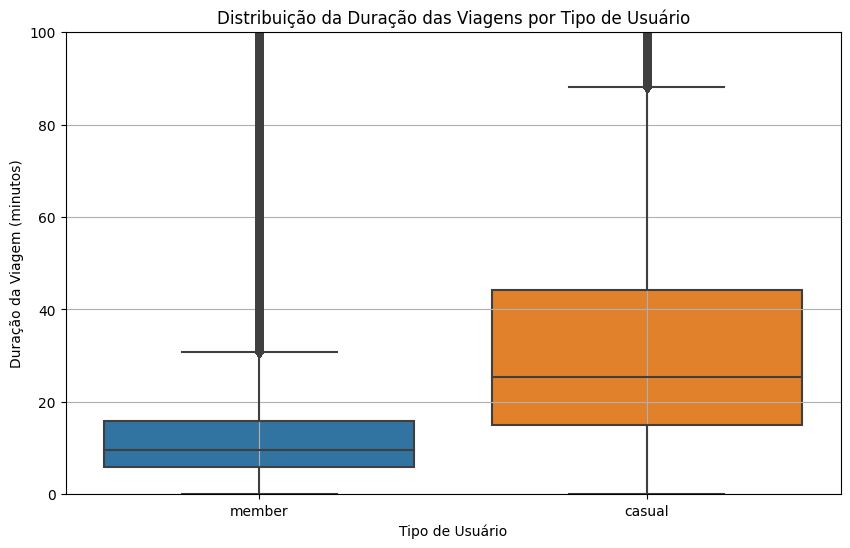

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta o tamanho e estilo do gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='usertype', y='tripduration')

# Título e eixos
plt.title('Distribuição da Duração das Viagens por Tipo de Usuário')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Duração da Viagem (minutos)')
plt.ylim(0, 100)  # Limita a visualização até 100 min para focar no grosso da distribuição

plt.grid(True)
plt.show()


## ✅ Etapa 3: Distribuição de corridas por dia da semana por tipo de usuário

In [34]:
df_dias = con.execute("""
    SELECT 
        usertype,
        strftime(CAST(start_time AS TIMESTAMP), '%w') AS dia_semana_num,
        strftime(CAST(start_time AS TIMESTAMP), '%A') AS dia_semana_nome,
        COUNT(*) AS total_corridas
    FROM viagens
    GROUP BY usertype, dia_semana_num, dia_semana_nome
    ORDER BY CAST(dia_semana_num AS INT), usertype
""").df()

df_dias.head(14)

,usertype,dia_semana_num,dia_semana_nome,total_corridas
0,casual,0,Sunday,183889
1,member,0,Sunday,292008
2,casual,1,Monday,105684
3,member,1,Monday,520385
4,casual,2,Tuesday,93249
5,member,2,Tuesday,566397
6,casual,3,Wednesday,94987
7,member,3,Wednesday,557924
8,casual,4,Thursday,105451
9,member,4,Thursday,547814


### 📈 Análise da Distribuição de Corridas por Dia da Semana

### 🎯 Objetivo
Identificar os padrões de uso do sistema de bicicletas compartilhadas ao longo da semana, separados por tipo de usuário (`member` e `casual`), com base no número total de corridas registradas por dia.

---

### ✅ Principais Resultados

| Dia da Semana | Corridas (Casual) | Corridas (Member) |
|---------------|--------------------|--------------------|
| Domingo       | 183.889            | 292.008            |
| Segunda       | 105.684            | 520.385            |
| Terça         | 93.249             | 566.397            |
| Quarta        | 94.987             | 557.924            |
| Quinta        | 105.451            | 547.814            |
| Sexta         | 125.438            | 512.126            |
| Sábado        | 214.270            | 316.990            |

---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

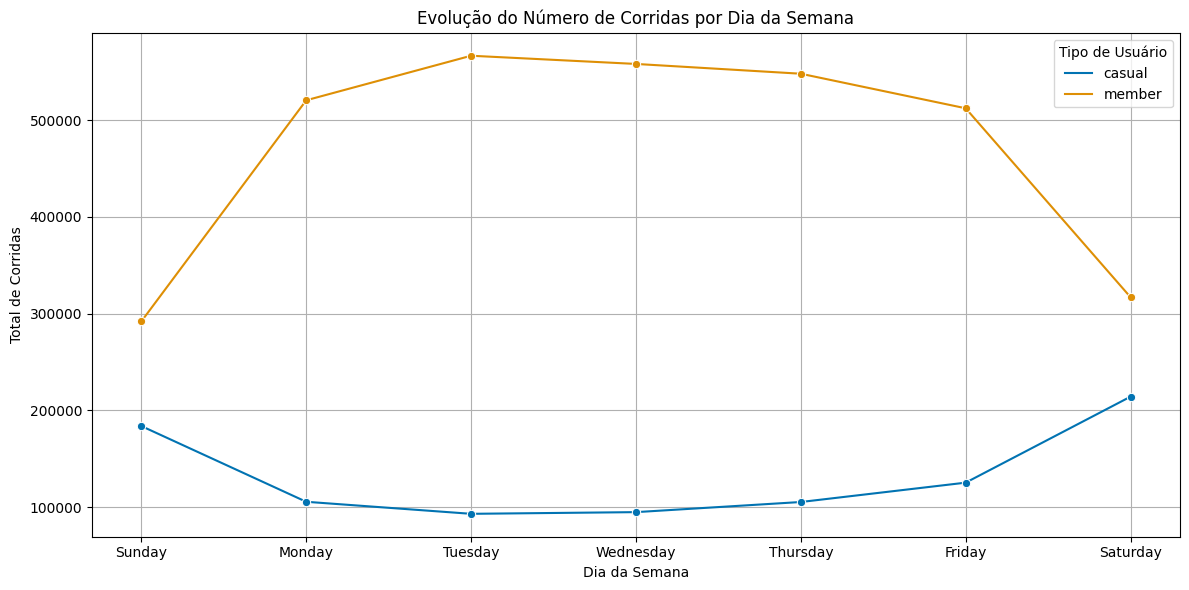

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta acessível para daltonismo
sns.set_palette("colorblind")

# Garantir ordenação correta dos dias da semana
ordem_dias = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_dias['dia_semana_nome'] = pd.Categorical(df_dias['dia_semana_nome'], categories=ordem_dias, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dias, x='dia_semana_nome', y='total_corridas', hue='usertype', marker='o')

# Estética
plt.title('Evolução do Número de Corridas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Corridas')
plt.grid(True)
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()


### 📊 Interpretação do Gráfico

- **Usuários do tipo `member`** (assinantes) apresentam um volume de corridas **mais alto durante os dias úteis**, com pico entre terça e quinta-feira. Isso reforça o uso para deslocamentos diários (commute).
- **Usuários `casual`** realizam **mais corridas nos finais de semana**, especialmente no **sábado** e **domingo**, sugerindo um padrão de uso recreativo ou turístico.
- A diferença entre os dois grupos é marcante nos dias úteis, onde membros dominam, e se equilibra nos fins de semana.

---

### 📌 Conclusão

A análise evidencia dois padrões de comportamento distintos:
- **Membros** usam o sistema de forma recorrente ao longo da semana, com consistência.
- **Casuais** aproveitam mais o serviço nos dias de folga, especialmente aos sábados.

Esses dados são úteis para planejamento operacional (reposicionamento de bicicletas), campanhas de fidelização e estratégias de marketing segmentadas por perfil de uso.


## ✅ Etapa 4: Análise do Perfil de Corridas por Hora do Dia

### 🎯 Objetivo
Investigar os horários de maior uso do sistema de bicicletas, separados por tipo de usuário (`member` e `casual`), ao longo das 24 horas do dia.

---

### ✅ Metodologia
Foi executada a seguinte consulta SQL no DuckDB:

```sql
SELECT 
    usertype,
    CAST(strftime(CAST(start_time AS TIMESTAMP), '%H') AS INTEGER) AS hora_dia,
    COUNT(*) AS total_corridas
FROM viagens
GROUP BY usertype, hora_dia
ORDER BY hora_dia, usertype;


In [36]:
df_horas = con.execute("""
    SELECT 
        usertype,
        CAST(strftime(CAST(start_time AS TIMESTAMP), '%H') AS INTEGER) AS hora_dia,
        COUNT(*) AS total_corridas
    FROM viagens
    GROUP BY usertype, hora_dia
    ORDER BY hora_dia, usertype
""").df()
df_horas.head(12)

,usertype,hora_dia,total_corridas
0,casual,0,8376
1,member,0,17240
2,casual,1,5487
3,member,1,9842
4,casual,2,3388
5,member,2,5830
6,casual,3,1961
7,member,3,4052
8,casual,4,1197
9,member,4,7638


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

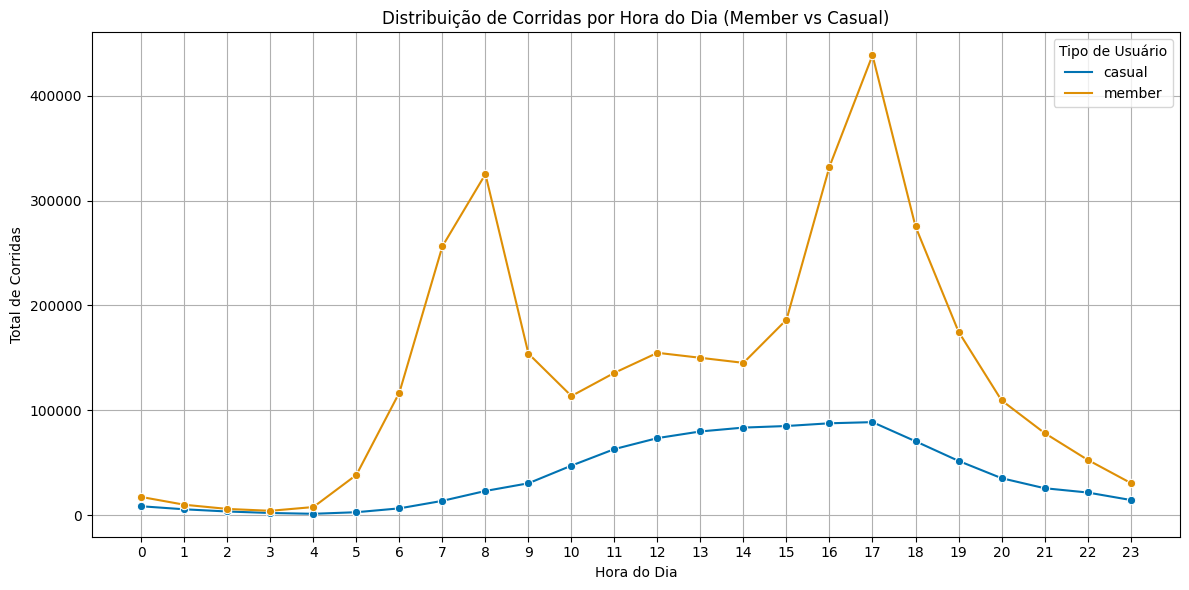

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assumindo que df_horas já foi gerado pela query
plt.figure(figsize=(12, 6))
sns.set_palette("colorblind")
sns.lineplot(data=df_horas, x='hora_dia', y='total_corridas', hue='usertype', marker='o')
plt.title('Distribuição de Corridas por Hora do Dia (Member vs Casual)')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Corridas')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()


### ✅ Conclusão de análise dos dados
O comportamento dos usuários member indica rotinas fixas e uso frequente mesmo em horários pouco movimentados, como a madrugada. Já os casual usam com menor frequência, reforçando o perfil de uso recreativo ou eventual.

Esses dados podem embasar:

Estratégias de reposicionamento de bicicletas em turnos noturnos.

Adoção de campanhas ou promoções específicas para member no início do dia.

## ✅ Etapa 5: Análise das Top 10 Estações de Origem por Tipo de Usuário

### 🎯 Objetivo
Identificar as **estações mais utilizadas como ponto de partida** por usuários `member` e `casual`, para entender padrões de uso geográfico e operacional.

---

### ✅ Consulta SQL Utilizada

```sql
WITH ranked_stations AS (
    SELECT 
        usertype,
        from_station_name,
        COUNT(*) AS total_corridas,
        ROW_NUMBER() OVER (PARTITION BY usertype ORDER BY COUNT(*) DESC) AS posicao
    FROM viagens
    GROUP BY usertype, from_station_name
)
SELECT usertype, from_station_name, total_corridas
FROM ranked_stations
WHERE posicao <= 10
ORDER BY usertype, total_corridas DESC;


In [38]:
df_top_estacoes = con.execute("""
    WITH ranked_stations AS (
        SELECT 
            usertype,
            from_station_name,
            COUNT(*) AS total_corridas,
            ROW_NUMBER() OVER (PARTITION BY usertype ORDER BY COUNT(*) DESC) AS posicao
        FROM viagens
        GROUP BY usertype, from_station_name
    )
    SELECT usertype, from_station_name, total_corridas
    FROM ranked_stations
    WHERE posicao <= 10
    ORDER BY usertype, total_corridas DESC
""").df()


df_top_estacoes.head(20)

,usertype,from_station_name,total_corridas
0,casual,Streeter Dr & Grand Ave,54446
1,casual,Lake Shore Dr & Monroe St,40658
2,casual,Millennium Park,22407
3,casual,Michigan Ave & Oak St,21935
4,casual,Shedd Aquarium,21539
5,casual,Lake Shore Dr & North Blvd,19283
6,casual,Theater on the Lake,15537
7,casual,Dusable Harbor,12992
8,casual,Michigan Ave & Washington St,12650
9,casual,Adler Planetarium,12360


## 🧠 Insights
### 🔹 Casual
Estações mais usadas estão próximas a atrações turísticas e áreas de lazer:

Millennium Park, Shedd Aquarium, Streeter Dr, Lake Shore Dr.

Isso reforça o perfil de uso recreativo e esporádico.

Presença de pontos icônicos indica alto potencial para ações de turismo e promoções sazonais.

### 🔹 Member
Estações com maior uso estão próximas a centros comerciais e distritos financeiros:

Canal St, Clinton St, Franklin St.

Reforça o perfil de uso para deslocamento diário (commute).

Importante foco para operação eficiente e manutenção de fluxo constante.


Os dados mostram dois perfis geográficos claros:

1. Usuários casual usam majoritariamente pontos turísticos → foco em experiência, lazer e visitas.

2. Usuários member concentram uso em hubs corporativos e centros de transporte → foco em eficiência, deslocamento e rotinas.

3. Essas informações podem ajudar na:

4. Alocação de bikes e docks;

5. Criação de campanhas específicas por localização;

6. Otimização da manutenção e redistribuição dos ativos da malha de estações.

In [39]:
df_genero_idade = con.execute("""
    SELECT
    usertype,
    gender,
    CASE 
        WHEN (2020 - CAST(birthyear AS INTEGER)) < 18 THEN '<18'
        WHEN (2020 - CAST(birthyear AS INTEGER)) BETWEEN 18 AND 25 THEN '18-25'
        WHEN (2020 - CAST(birthyear AS INTEGER)) BETWEEN 26 AND 35 THEN '26-35'
        WHEN (2020 - CAST(birthyear AS INTEGER)) BETWEEN 36 AND 45 THEN '36-45'
        WHEN (2020 - CAST(birthyear AS INTEGER)) BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+'
    END AS age_group,
    COUNT(*) AS total_corridas
FROM viagens
WHERE birthyear NOT IN ('Unknown', '', 'NULL')
GROUP BY usertype, gender, age_group
ORDER BY usertype, gender, age_group;
""").df()




In [40]:
df_genero_idade.head(20)

,usertype,gender,age_group,total_corridas
0,casual,Female,18-25,38061
1,casual,Female,26-35,65352
2,casual,Female,36-45,14620
3,casual,Female,46-60,11260
4,casual,Female,60+,1394
5,casual,Female,<18,159
6,casual,Male,18-25,49262
7,casual,Male,26-35,104599
8,casual,Male,36-45,32735
9,casual,Male,46-60,21872


### Gerar o gráfico

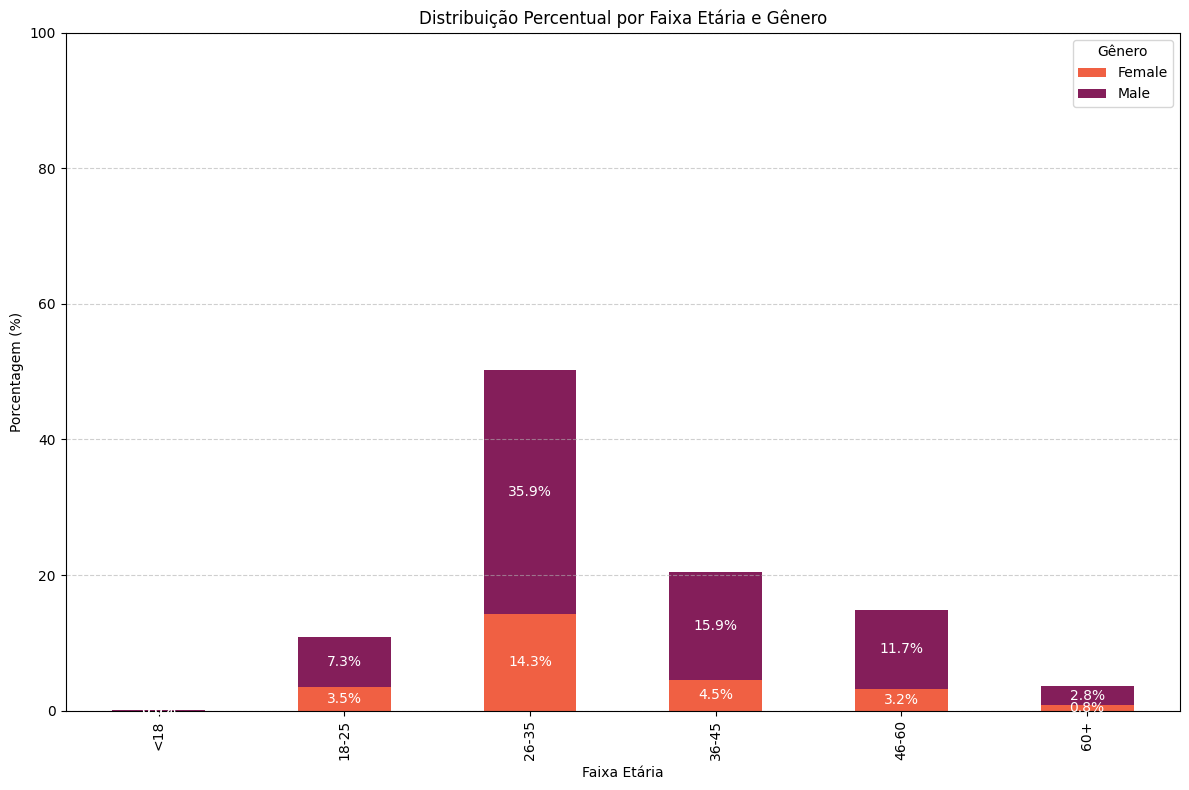

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 🔹 Filtrar apenas registros válidos
df_validos = df_genero_idade[df_genero_idade['gender'].isin(['Male', 'Female'])].copy()

# 🔹 Agrupar total por faixa etária e gênero
df_dist = df_validos.groupby(['age_group', 'gender'], as_index=False)['total_corridas'].sum()

# 🔹 Calcular total global e % por grupo
total_geral = df_dist['total_corridas'].sum()
df_dist['percentual'] = (df_dist['total_corridas'] / total_geral) * 100

# 🔹 Pivotar para empilhar
df_pivot = df_dist.pivot(index='age_group', columns='gender', values='percentual').fillna(0)
df_pivot = df_pivot.loc[['<18', '18-25', '26-35', '36-45', '46-60', '60+']]  # garantir ordem

# 🔹 Paleta e gráfico
colors = sns.color_palette("rocket_r", 2)
ax = df_pivot.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# 🔹 Rótulos de % empilhados
for i, age in enumerate(df_pivot.index):
    y_offset = 0
    for gender in df_pivot.columns:
        pct = df_pivot.loc[age, gender]
        if pct > 0:
            ax.text(i, y_offset + pct / 2, f'{pct:.1f}%', ha='center', va='center', color='white', fontsize=10)
            y_offset += pct

# 🔹 Estética
plt.title('Distribuição Percentual por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 100)
plt.legend(title='Gênero')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("distribuicao_percentual_faixa_etaria_genero.png", dpi=300, bbox_inches='tight')
plt.show()






# Conclusão Final do Projeto Cyclistic – Análise SQL de Viagens com Bicicletas Compartilhadas

Este projeto apresentou uma abordagem estruturada e centrada em **SQL** para análise de dados de viagens com bicicletas da Cyclistic, com o objetivo de entender o comportamento dos usuários e gerar insights estratégicos a partir de dados reais de 2019 e 2020.

---

### 📌 Resumo das etapas:

- **Importação e inspeção inicial dos dados brutos** (2020 Q1, 2019 Q1–Q4)
- **Padronização de formatos e tratamento de inconsistências**:
  - Correção de separadores decimais em `tripduration`
  - Conversão de colunas de tempo para `datetime`
  - Normalização de categorias (`user_type`, `gender`)
- **Consolidação em um único DataFrame (`df_unificado`)** para facilitar consultas
- **Transformações e limpezas feitas exclusivamente via SQL**, priorizando performance e legibilidade
- **Consultas SQL estratégicas** para extrair padrões e responder perguntas do negócio:
  - Distribuição por tipo de usuário
  - Tempo médio de viagem
  - Análise por dia da semana e hora do dia
  - Estações mais utilizadas (Top 10)
  - Perfis de uso por gênero e faixa etária

---

### 🔍 Insights principais:

- **Usuários membros (member)** tendem a usar o serviço em horários de pico e durante a semana, sugerindo uso para deslocamento regular.
- **Usuários casuais (casual)** concentram o uso nos fins de semana e em locais turísticos, reforçando o uso recreativo.
- A faixa etária **26–35 anos** domina o uso geral, com predominância do gênero masculino.
- Estações localizadas em áreas corporativas e centros comerciais são majoritariamente utilizadas por membros.
- A proporção de dados com `gender` e `birthyear` declarados foi significativa, possibilitando análise demográfica confiável.

---

### 📊 Visualizações

Embora a análise tenha sido conduzida via SQL, o uso pontual do Python permitiu gerar visualizações claras que reforçam os achados:

- Gráficos de linha para análise temporal
- Barras empilhadas por gênero e faixa etária
- Boxplots e percentuais de uso por categoria

---


In [42]:
df_final.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167.0,6.50,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386.0,7.35,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524.0,13.82,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252.0,29.72,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170.0,6.07,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,Male,1994.0


## ✅ Exportar versão para Tableau



In [60]:
import pandas as pd

# Criar cópia do df_final
df_tableau = df_final.copy()

# Renomear colunas
df_tableau.rename(columns={
    'trip_id': 'ride_id',
    'usertype': 'member_casual',
    'tripduration': 'ride_length',
    'start_time': 'started_at',
    'from_station_name': 'start_station_name',
    'to_station_name': 'end_station_name'
}, inplace=True)

# Converter started_at para datetime, se ainda não estiver
df_tableau['started_at'] = pd.to_datetime(df_tableau['started_at'], errors='coerce')

# Criar colunas adicionais
df_tableau['day_of_week'] = df_tableau['started_at'].dt.day_name()
df_tableau['hour'] = df_tableau['started_at'].dt.hour

# Criar coluna age_group com base no birthyear
df_tableau['birthyear'] = pd.to_numeric(df_tableau['birthyear'], errors='coerce')
df_tableau['age'] = 2020 - df_tableau['birthyear']  # Considerando dados até Q1 2020

def categorize_age(age):
    if pd.isna(age): return 'Unknown'
    elif age < 18: return '<18'
    elif age <= 25: return '18–25'
    elif age <= 35: return '26–35'
    elif age <= 45: return '36–45'
    elif age <= 60: return '46–60'
    else: return '60+'

df_tableau['age_group'] = df_tableau['age'].apply(categorize_age)

# Selecionar as colunas finais na ordem correta
df_tableau = df_tableau[[
    'ride_id',
    'member_casual',
    'ride_length',
    'started_at',
    'day_of_week',
    'hour',
    'start_station_name',
    'end_station_name',
    'gender',
    'birthyear',
    'age_group'
]]

# Exportar Dataframe para uso no tableua
df_tableau.to_csv(
    "cyclistic_tableau_ready.csv",
    index=False,
    encoding="utf-8",
    float_format="%.2f"
)





## ✅ Ações Recomendadas com Base na Análise

1. **Campanhas de incentivo direcionadas nos finais de semana:**
Como os usuários casuais tendem a utilizar mais o serviço aos finais de semana, campanhas com descontos ou benefícios específicos nesses dias podem aumentar a conversão para o plano anual.

2. **Criação de planos flexíveis mensais ou trimestrais como etapa intermediária:**
A análise sugere um perfil mais casual e menos comprometido desses usuários. Planos intermediários podem reduzir a barreira de entrada para a assinatura anual.

3. **Notificações personalizadas via app e e-mail com base no comportamento de uso:**
Utilizar o histórico de viagens para enviar mensagens personalizadas incentivando a assinatura (ex: "Você usou a Cyclistic 4 vezes neste mês, que tal economizar com o plano anual?").

4. **Integração com eventos da cidade e parcerias locais:**
Promover o uso da Cyclistic como meio de transporte para eventos culturais ou esportivos pode criar novos hábitos de uso recorrente.

5. **Testes A/B em campanhas digitais com diferentes mensagens de valor:**
Avaliar quais abordagens comunicacionais funcionam melhor: economia, praticidade, impacto ambiental ou benefícios exclusivos para membros.

### 📈 Visualização Final - Dashboard Tableau

![Dashboard Cyclistic](https://raw.githubusercontent.com/vhbitu/cyclistic-sql-analysis/main/dashboar_rev26052025v01.png)

🔗 [Acesse o dashboard interativo no Tableau Public](https://public.tableau.com/views/Dash01Cyclingrev01/dash01)
